In [1]:
import pandas as pd
import numpy as np
from array import *

# using datetime module
import datetime;

# Binary Search
from bisect import bisect_left
from bisect import bisect_right

from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

import multiprocessing as mp
from multiprocessing import Process, Queue
import queue
import threading


print('----------------------')
print('done!')



----------------------
done!


In [2]:
print('----------------------')

#print(os.path.basename("/path/to/some/file.txt"))
#print(os.path.dirname("/path/to/some/file.txt"))

BASE_ADDRESS = '/local/scratch/exported/blockchain_parsed/cardano_mostafa/ShengNan_Li_Cardano_Addresses/'
TEMP_ADDRESS = BASE_ADDRESS + '/temp_files/'


print('----------------------')
print('done!')


----------------------
----------------------
done!


In [3]:
# Read ("sorted" "unique" array_list) [= unique_addresses] from file:

##########################################################################################
def load_file_to_array (file_name, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Array): ', ct)

    df = pd.read_csv(file_name, header=header_)
    output_array_name = df.to_numpy()

    #for index, row in df.iterrows():
    #    new_line = df.loc[index , 0]
    #    output_array_name.append(new_line)
    #    if (index%1000000 == 0):
    #            print('One New Milion Records loaded: ', index)

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Array): ', et)
    
    return output_array_name

##########################################################################################
print('----------------------')


file_name = '/local/scratch/exported/blockchain_parsed/cardano_mostafa/UniqueAddressesList__Cardano_TXs_All__2022-12-05_190921.txt'
unique_addresses = load_file_to_array (file_name)


print('Length of \"unique_addresses\" = ' + str(len(unique_addresses)))

##########################################################################################
print('----------------------')
print('done!')


----------------------
start time (Load /local/scratch/exported/blockchain_parsed/cardano_mostafa/UniqueAddressesList__Cardano_TXs_All__2022-12-05_190921.txt to Array):  2022-12-10 23:58:24.607066
elapsed time (Load /local/scratch/exported/blockchain_parsed/cardano_mostafa/UniqueAddressesList__Cardano_TXs_All__2022-12-05_190921.txt to Array):  0:00:44.731912
Length of "unique_addresses" = 39057254
----------------------
done!


In [4]:
# Create List of all Addresses [= address_list]:

def BinarySearch(a, x):
    i = bisect_left(a, x)
    if i < len(a) and a[i] == x:
        return i
    else:
        #print('BinarySearch Error: -1')
        return -1



print('----------------------')

# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)
print('----------------------')


CSV_FILES_NAME_FORMAT = BASE_ADDRESS + '/cardano_epoch_TXs_'
NUMBER_OF_CSV_FILES   = 9
CSV_FILES_SUFFIX      = '.csv'


place_holder = 999999999999
epochs_array = np.array([place_holder] * len(unique_addresses))


#address_list = []
#unique_addresses = np.array([], dtype=str)
#num_of_addrs_in_epoch = np.array([0] * 400)

#epoch_cnt = 0



for i in range(0, NUMBER_OF_CSV_FILES):
    
    ct_temp = datetime.datetime.now()

    file_name = CSV_FILES_NAME_FORMAT + str(i) + CSV_FILES_SUFFIX
    df = pd.read_csv(file_name, delimiter='|')
    
    # Repalce NaN with -1 on all columns 
    df['EPOCH_NO'].fillna(-1, inplace=True)

    
    et_temp = datetime.datetime.now() - ct_temp
    print("elapsed time (Load CSV File " + file_name + "): ", et_temp)

    ct_temp = datetime.datetime.now()

    err_not_found = 0
        
    for index, row in df.iterrows():
        tx_output_rawaddress = df.loc[index, 'OUTPUT_RAWADDR']
        x = BinarySearch(unique_addresses, tx_output_rawaddress)

        if (x == -1): # not found in array
            if(int(df.loc[index, 'TX_ID']) > 56197676):
                 #print('WARNING: address with TX_ID > 56197676! rawaddress = ', tx_output_rawaddress)
                continue;
            else:
                print('ERROR: address not found! rawaddress = ', tx_output_rawaddress)
                err_not_found = err_not_found + 1
        else:
            if(epochs_array[x] == place_holder):
                epochs_array[x] = int(df.loc[index, 'EPOCH_NO'])
                #if(df.isnull().loc[index, 'EPOCH_NO']):
                #    epochs_array[x] = -1
                #else:
                #    epochs_array[x] = int(df.loc[index, 'EPOCH_NO'])
        

        '''
        inputs_list = list( df.loc[index , 'INPUTs'].split(';') )
        outputs_list = list( df.loc[index , 'OUTPUTs'].split(';') )
        ##########################################################################################
        i = 0
        for tx_input in inputs_list:
            tx_input_UTXO_address = tx_input.split(',')[4]
            address_list.append(tx_input_UTXO_address)
            i = i+1
        ##########################################################################################
        i = 0
        for tx_output in outputs_list:
            tx_output_UTXO_address = tx_output.split(',')[1]
            address_list.append(tx_output_UTXO_address)
            i = i+1
        ##########################################################################################
        '''


        '''
        blk_epoch_no = int(df.loc[index, 'EPOCH_NO'])
        if (blk_epoch_no != epoch_cnt): # if it's a new epoch
            epoch_cnt = epoch_cnt + 1
            if(blk_epoch_no != epoch_cnt):
                print('ERROR: unordered epoch_no!')
                return -1

        else:
            tx_output_rawaddress = df.loc[index, 'OUTPUT_RAWADDR']
            x = BinarySearch(address_list, tx_output_rawaddress)

            if (x == -1): # not found in array
                address_list.append(tx_output_rawaddress)
                insert_indx = np.searchsorted(unique_addresses, tx_output_rawaddress)
                unique_addresses = np.insert(unique_addresses, insert_indx, tx_output_rawaddress)
                epoch_no = int(df.loc[index, 'EPOCH_NO'])
                num_of_addrs_in_epoch[epoch_no] = num_of_addrs_in_epoch[epoch_no] + 1

            if (index % 100000 == 0):
                print('100,000 New records were processed! ', index)
        '''


        

    et_temp = datetime.datetime.now() - ct_temp
    print("elapsed time (Extract Addresses from CSV File " + file_name + "): ", et_temp)
    
    print('err_not_found in ' + file_name + ' = ', err_not_found)




print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Create unique_addresses List in Python): ", et)


print('----------------------')
print('done!')



----------------------
current time:  2022-12-10 23:59:44.695675
----------------------
elapsed time (Load CSV File /local/scratch/exported/blockchain_parsed/cardano_mostafa/ShengNan_Li_Cardano_Addresses//cardano_epoch_TXs_0.csv):  0:00:00.014861
elapsed time (Extract Addresses from CSV File /local/scratch/exported/blockchain_parsed/cardano_mostafa/ShengNan_Li_Cardano_Addresses//cardano_epoch_TXs_0.csv):  0:00:02.195395
err_not_found in /local/scratch/exported/blockchain_parsed/cardano_mostafa/ShengNan_Li_Cardano_Addresses//cardano_epoch_TXs_0.csv =  0
elapsed time (Load CSV File /local/scratch/exported/blockchain_parsed/cardano_mostafa/ShengNan_Li_Cardano_Addresses//cardano_epoch_TXs_1.csv):  0:00:01.716238
elapsed time (Extract Addresses from CSV File /local/scratch/exported/blockchain_parsed/cardano_mostafa/ShengNan_Li_Cardano_Addresses//cardano_epoch_TXs_1.csv):  0:03:40.436232
err_not_found in /local/scratch/exported/blockchain_parsed/cardano_mostafa/ShengNan_Li_Cardano_Addresses/

In [5]:
# Verify the output array:

err_cnt = 0
before_epoch0_addrs = 0

for i in range(len(epochs_array)):
    if(epochs_array[i] == place_holder):
        err_cnt = err_cnt + 1
    
    if(epochs_array[i] == -1):
        before_epoch0_addrs = before_epoch0_addrs + 1

print('err_cnt = ', err_cnt)
print('before_epoch0_addrs = ', before_epoch0_addrs)
print('len(epochs_array) = ', len(epochs_array))


err_cnt =  0
before_epoch0_addrs =  14505
len(epochs_array) =  39057254


In [8]:
# Find number of new addresses in each epoch:

##########################################################################################
def BinarySearch_Find_start_end(a, x):
    i = bisect_left(a, x)
    j = bisect_right(a, x) - 1
    if i < len(a) and a[i] == x and j < len(a) and a[j] == x:
        return [i, j]
    else:
        print('BinarySearch Error: -1')
        print('x = ', x)
        print('i = ', i)
        print('j = ', j)
        return -1


##########################################################################################


print('----------------------')
ct = datetime.datetime.now()
print("start time: ", ct)

print('----------------------')
sorted_epochs_array = np.sort(epochs_array, axis=None)  # sort the flattened array
print('epochs_array was sorted !')


num_of_epochs = max(sorted_epochs_array) + 1
#num_of_epochs = 378 + 1
print('number of epochs = ', num_of_epochs)


num_of_addrs_in_epoch = np.array([0] * (num_of_epochs))


# addresses in block 1 (before epoch 0)
x = BinarySearch_Find_start_end(sorted_epochs_array, -1)
num_of_addrs_in_epoch_MINUS_ONE = x[1] - x[0] + 1
print('num_of_addrs_in_epoch_MINUS_ONE = ', num_of_addrs_in_epoch_MINUS_ONE)


# addresses in blocks 2,3,... (from epoch 0 to 380)
for i in range(0, num_of_epochs):
    x = BinarySearch_Find_start_end(sorted_epochs_array, i)
    num_of_addrs_in_epoch[i] = x[1] - x[0] + 1
    #print('num_of_cluster_members[' + str(i) + '] = ', num_of_cluster_members[i]);


print('----------------------')
et = datetime.datetime.now() - ct
print("elapsed time: ", et)


##########################################################################################

print('----------------------')
print('done!')


----------------------
start time:  2022-12-12 09:33:30.736385
----------------------
epochs_array was sorted !
number of epochs =  379
num_of_addrs_in_epoch_MINUS_ONE =  14505
----------------------
elapsed time:  0:00:09.535580
----------------------
done!


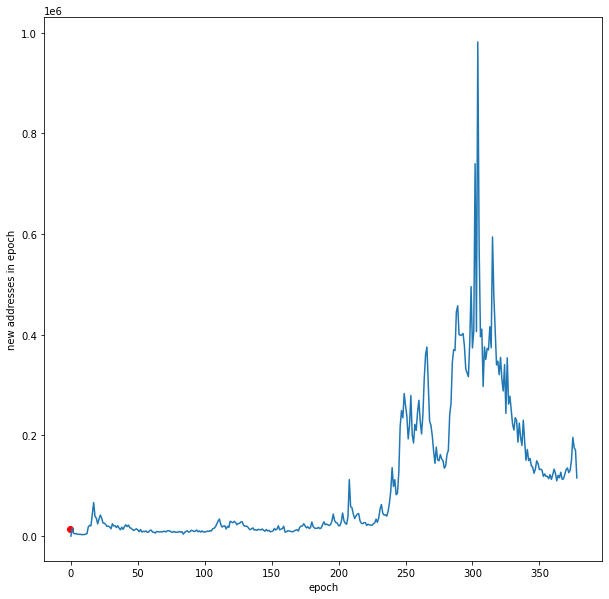

num_of_addrs_in_epoch_MINUS_ONE =  14505
-----------------------
max =  981432
min =  45
sum =  39042749
-----------------------
x[0] =  45
x[1] =  15946


In [26]:
# Plot result of clustering:

plt.plot(num_of_addrs_in_epoch)
plt.scatter(-1, num_of_addrs_in_epoch_MINUS_ONE, c='red')

plt.xlabel('epoch')
plt.ylabel('new addresses in epoch')


# changing the rc parameters and plotting a line plot
#plt.rcParams['figure.figsize'] = [10, 10]


plt.show()

print('num_of_addrs_in_epoch_MINUS_ONE = ', num_of_addrs_in_epoch_MINUS_ONE)
print('-----------------------')
print('max = ', max(num_of_addrs_in_epoch))
print('min = ', min(num_of_addrs_in_epoch))
print('sum = ', sum(num_of_addrs_in_epoch))
print('-----------------------')
print('x[0] = ', num_of_addrs_in_epoch[0])
print('x[1] = ', num_of_addrs_in_epoch[1])


In [13]:
##########################################################################################
def store_array_to_file (input_array_name, file_name, index_=False, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Array to ' + file_name + '): ', ct)

    df = pd.DataFrame(input_array_name)
    df.to_csv(file_name, index=index_, header=header_)
    
    #with open(file_name, 'w') as filehandle:
    #    for element in input_array_name:
    #        filehandle.write(f'{element}\n')

    et = datetime.datetime.now() - ct
    print('elapsed time (Store Array to ' + file_name + '): ', et)

    return

##########################################################################################

store_array_to_file (num_of_addrs_in_epoch, '/local/scratch/exported/blockchain_parsed/cardano_mostafa/ShengNan_Li_Cardano_Addresses/num_of_addrs_in_epochs.txt', index_=True)
